In [75]:
import pickle
import joblib
import json
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import ConfusionMatrixDisplay

In [27]:
iris = load_iris(as_frame=False)

In [65]:
with open('iris_classifier/class_names.json', 'wt') as f:
    json.dump(
        {i:n.item() for i, n in enumerate(iris.target_names)},
        f,
        indent=4
    )

In [29]:
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)

In [31]:
X_train.shape, X_test.shape

((112, 4), (38, 4))

In [34]:
preprocessor = Pipeline([
    ('standardize', StandardScaler()),
    ('impute', SimpleImputer(strategy='median'))
])

In [35]:
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

In [66]:
with open('iris_classifier/preprocessor.pkl', 'wb') as f:
    pickle.dump(preprocessor, f)

In [76]:
with open('iris_classifier/preprocessor.joblib', 'wb') as f:
    joblib.dump(preprocessor, f)

In [36]:
log_clf = LogisticRegression()
log_clf.fit(X_train, y_train)

LogisticRegression()

In [67]:
with open('iris_classifier/log_clf.pkl', 'wb') as f:
    pickle.dump(log_clf, f)

In [77]:
with open('iris_classifier/log_clf.joblib', 'wb') as f:
    joblib.dump(log_clf, f)

In [43]:
y_pred = log_clf.predict(X_test)

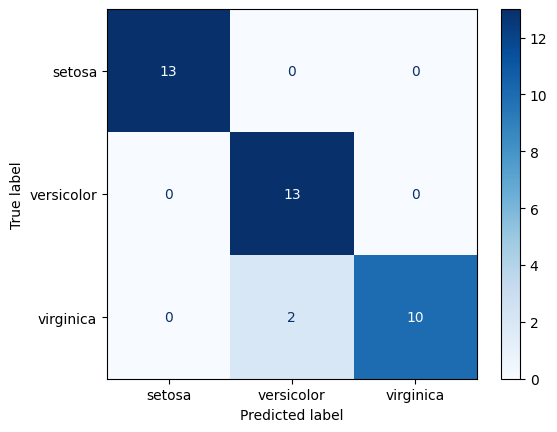

In [52]:
ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred, 
    display_labels=iris.target_names,
    cmap='Blues'
)
plt.show()

In [45]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9473684210526315

In [73]:
import tarfile

with tarfile.open('iris_classifier.tar.gz', 'w:gz') as tar:
    tar.add('iris_classifier', arcname='iris_classifier')

```python
with tarfile.open('iris_classifier.tar.gz', 'r:gz') as tar:
    tar.extractall('extracted_model')
```